# Get dataset

In [2]:
from google.colab import drive
 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
project_path = '/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R2'
in_dataset_path = '{}/in'.format(project_path)
file_name = 'nietzsche.txt'
%cd /content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R2

/content/gdrive/MyDrive/Colab Notebooks/AI lab school/Examen R2


In [4]:
book_url = "https://s3.amazonaws.com/text-datasets/nietzsche.txt"

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download dataset

In [ ]:
import requests
import os

def download_file(file_url, filename_with_path):
  r = requests.get(file_url, stream = True)
  
  with open(filename_with_path, "wb") as file:
      for block in r.iter_content(chunk_size = 1024):
          if block:
              file.write(block)

In [ ]:
def create_in_folder(project_path):
  %pwd
  try:
    os.mkdir("in")
  except:
    print("In already exists");
  os.chdir(project_path)

In [ ]:
create_in_folder(project_path)

In already exists


In [ ]:
download_file(book_url, "{}/{}".format(in_dataset_path, file_name))

## Load dataset to memory

In [6]:
def open_corpus():
  return open('{}/{}'.format(in_dataset_path, file_name), 'r')

def get_corpus_str(): 
  f = open_corpus()
  corpus = ''
  for line in f:
    corpus += line.strip() + "\n"
  return corpus

In [7]:
corpus = get_corpus_str()
corpus

'PREFACE\n\n\nSUPPOSING that Truth is a woman--what then? Is there not ground\nfor suspecting that all philosophers, in so far as they have been\ndogmatists, have failed to understand women--that the terrible\nseriousness and clumsy importunity with which they have usually paid\ntheir addresses to Truth, have been unskilled and unseemly methods for\nwinning a woman? Certainly she has never allowed herself to be won; and\nat present every kind of dogma stands with sad and discouraged mien--IF,\nindeed, it stands at all! For there are scoffers who maintain that it\nhas fallen, that all dogma lies on the ground--nay more, that it is at\nits last gasp. But to speak seriously, there are good grounds for hoping\nthat all dogmatizing in philosophy, whatever solemn, whatever conclusive\nand decided airs it has assumed, may have been only a noble puerilism\nand tyronism; and probably the time is at hand when it will be once\nand again understood WHAT has actually sufficed for the basis of such\

In [8]:
from tensorflow import keras
filepath = keras.utils.get_file("nietzsche.txt", book_url)
with open(filepath) as f:
  nietzsche_text = f.read()

614400/600901 [==============================] - 0s 0us/step


# Data Visualization

In [9]:
nietzsche_text

'PREFACE\n\n\nSUPPOSING that Truth is a woman--what then? Is there not ground\nfor suspecting that all philosophers, in so far as they have been\ndogmatists, have failed to understand women--that the terrible\nseriousness and clumsy importunity with which they have usually paid\ntheir addresses to Truth, have been unskilled and unseemly methods for\nwinning a woman? Certainly she has never allowed herself to be won; and\nat present every kind of dogma stands with sad and discouraged mien--IF,\nindeed, it stands at all! For there are scoffers who maintain that it\nhas fallen, that all dogma lies on the ground--nay more, that it is at\nits last gasp. But to speak seriously, there are good grounds for hoping\nthat all dogmatizing in philosophy, whatever solemn, whatever conclusive\nand decided airs it has assumed, may have been only a noble puerilism\nand tyronism; and probably the time is at hand when it will be once\nand again understood WHAT has actually sufficed for the basis of such\

In [12]:
import nltk
pattern = r'''(?x)                 # set flag to allow verbose regexps
              (?:[A-Z]\.)+         # abbreviations, e.g. U.S.A.
              | \w+(?:-\w+)*       # words with optional internal hyphens
              | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
              | \.\.\.             # ellipsis
              | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
'''
text = nltk.regexp_tokenize(nietzsche_text, pattern)

In [14]:
len(text)

116791

In [16]:
def riqueza_lexica(text):
  vocabulary=sorted(set(text))
  return len(vocabulary)/len(text)

riqueza_lexica(text)

0.10146329768560934

In [21]:
from nltk.collocations import *
from nltk.util import ngrams
fdist = FreqDist(text)

In [18]:
fdist.most_common(20)

[(',', 8201),
 ('the', 5975),
 ('of', 4594),
 ('and', 3720),
 ('to', 2758),
 ('.', 2694),
 ('in', 2051),
 ('"', 1990),
 ('is', 1971),
 ('a', 1926),
 ('that', 1336),
 ('as', 1235),
 ('it', 1148),
 ('for', 867),
 ('which', 854),
 ('be', 761),
 ('not', 682),
 ('with', 681),
 (':', 667),
 (';', 627)]

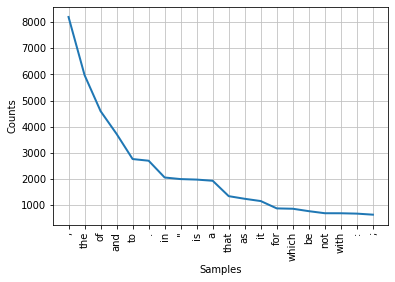

In [19]:
fdist.plot(20)

In [23]:
mb_bigrams=list(ngrams(text, 2))
fdist=FreqDist(mb_bigrams)

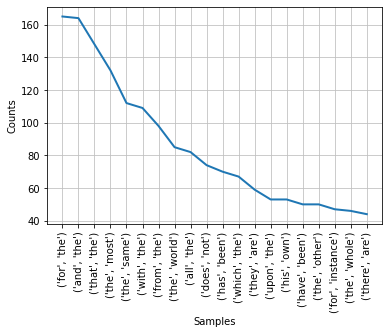

In [25]:
#Filtrado de bi-gramas
treshold=2
filtered_bigrams = [bigram for bigram in mb_bigrams if len(bigram[0])>treshold and len(bigram[1])>treshold]

filtered_dist=FreqDist(filtered_bigrams)
filtered_dist.plot(20)

In [27]:
import pandas as pd

md_bigrams = list(ngrams(text, 2))

threshold=2
filtered_bigrams = [bigram for bigram in mb_bigrams if len(bigram[0])>treshold and len(bigram[1])>treshold]
filtered_bigram_dist=FreqDist(filtered_bigrams)

filtered_words = [word for word in text if len(word)>threshold]
filtered_words_dist=FreqDist(filtered_words)

df=pd.DataFrame()
df['bi_grams']=list(set(filtered_bigrams))
df['word_0']=df['bi_grams'].apply(lambda x: x[0])
df['word_1']=df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq']= df['bi_grams'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq']= df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq']= df['word_1'].apply(lambda x: filtered_words_dist[x])

In [28]:
df

,bi_grams,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(own, secret)",own,secret,1,145,18
1,"(lie, the)",lie,the,1,11,5975
2,"(the, coming)",the,coming,1,5975,12
3,"(change, their)",change,their,1,7,387
4,"(fix, values)",fix,values,1,5,13
...,...,...,...,...,...,...
33463,"(also, belongs)",also,belongs,1,204,23
33464,"(takes, pleasure)",takes,pleasure,1,28,48
33465,"(lives, more)",lives,more,1,24,361
33466,"(impulse, rules)",impulse,rules,1,23,5


In [30]:
import numpy as np

df['PMI']=df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])), axis=1)
df['log(bi_gram_freq)']= df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_grams,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(own, secret)",own,secret,1,145,18,-11.349834,0.0
1,"(lie, the)",lie,the,1,11,5975,-16.004155,0.0
2,"(the, coming)",the,coming,1,5975,12,-16.129685,0.0
3,"(change, their)",change,their,1,7,387,-11.403545,0.0
4,"(fix, values)",fix,values,1,5,13,-6.022368,0.0
...,...,...,...,...,...,...,...,...
33463,"(also, belongs)",also,belongs,1,204,23,-12.195987,0.0
33464,"(takes, pleasure)",takes,pleasure,1,28,48,-10.392317,0.0
33465,"(lives, more)",lives,more,1,24,361,-13.080818,0.0
33466,"(impulse, rules)",impulse,rules,1,23,5,-6.845490,0.0


In [31]:
df.sort_values(by='PMI', ascending=False)

,bi_grams,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
24473,"(dive, BENEATH)",dive,BENEATH,1,1,1,0.000000,0.0
8048,"(Easter, festivals)",Easter,festivals,1,1,1,0.000000,0.0
13092,"(painfulest, recollections)",painfulest,recollections,1,1,1,0.000000,0.0
14995,"(VIRTUS, DORMITIVA)",VIRTUS,DORMITIVA,1,1,1,0.000000,0.0
21686,"(baffling, discords)",baffling,discords,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
24629,"(the, all)",the,all,2,5975,579,-20.722143,1.0
22229,"(his, and)",his,and,1,551,3720,-20.966995,0.0
24785,"(this, the)",this,the,1,515,5975,-21.553152,0.0
20670,"(one, the)",one,the,1,550,5975,-21.648011,0.0


In [33]:
import plotly.express as px

fig = px.scatter(x=df['PMI'].values, y=df['log(bi_gram_freq)'], color=df['PMI']+df['log(bi_gram_freq)'],
               hover_name=df['bi_grams'].values, width=600,height=600, labels={'x':'PMI', 'y':'log(Bigram frequency)'})
fig.show()

In [35]:
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text)

In [36]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('free', 'spirits'),
 ('no', 'longer'),
 ("'", 's'),
 ('other', 'hand'),
 ('let', 'us'),
 ('I', 'mean'),
 ('at', 'least'),
 ('same', 'time'),
 ('at', 'present'),
 ('so', 'far')]

# Preprocess data

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(nietzsche_text)

In [ ]:
tokenizer.texts_to_sequences(["herself"])

[[10, 2, 9, 8, 2, 11, 15]]

In [ ]:
tokenizer.sequences_to_texts([[10, 2, 9, 8, 2, 11, 15]])

['h e r s e l f']

In [ ]:
max_id = len(tokenizer.word_index)
dataset_size = tokenizer.document_count
print(max_id)
print(dataset_size)

57
600893


In [ ]:
import numpy as np
[encoded] = np.array(tokenizer.texts_to_sequences([nietzsche_text])) - 1

In [ ]:
import tensorflow as tf
def create_dataset(encoded, n_steps = 100, batch_size = 32):
    train_size = dataset_size * 90 // 100
    dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])
    
    
    window_lenght = n_steps + 1
    dataset = dataset.window(window_lenght, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_lenght))
    
    dataset = dataset.shuffle(10000).batch(batch_size)
    dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
    dataset = dataset.map(lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
    dataset = dataset.prefetch(1)
    
    return dataset

In [ ]:
dataset = create_dataset(encoded, batch_size=64)

# Generate model

In [ ]:
def create_lstm_model():
  model = keras.models.Sequential([
      keras.layers.LSTM(256, return_sequences=True, input_shape=[None, max_id], dropout=0.2),
      keras.layers.LSTM(128, return_sequences=True, dropout=0.2),
      keras.layers.TimeDistributed(
          keras.layers.Dense(max_id, activation="softmax")
          )
  ])
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
  return model

In [ ]:
def create_gru_model():
  model = keras.models.Sequential([
      keras.layers.GRU(256, return_sequences=True, input_shape=[None, max_id], dropout=0.2),
      keras.layers.GRU(128, return_sequences=True, dropout=0.2),
      keras.layers.TimeDistributed(
          keras.layers.Dense(max_id, activation="softmax")
          )
  ])
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
  return model

In [ ]:
dataset = create_dataset(encoded, batch_size=2048)

In [ ]:
lstm_model = create_lstm_model()

In [ ]:
gru_model = create_gru_model()

In [ ]:
def train_model(model, model_name, epochs=30):
  filepath =  "out/{}.h5".format(model_name)
  checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
  history = model.fit(dataset, epochs=epochs, callbacks=[checkpoint_callback])
  return history

In [ ]:
train_model(lstm_model, "lstm_model")

Epoch 1/30
    528/Unknown - 99s 186ms/step - loss: 2.5798
Epoch 1: loss improved from -inf to 2.57978, saving model to out/lstm_model.hdf5
529/529 [==============================] - 100s 186ms/step - loss: 2.5798
Epoch 2/30
528/529 [============================>.] - ETA: 0s - loss: 2.3119
Epoch 2: loss did not improve from 2.57978
529/529 [==============================] - 99s 185ms/step - loss: 2.3119
Epoch 3/30
528/529 [============================>.] - ETA: 0s - loss: 2.1878
Epoch 3: loss did not improve from 2.57978
529/529 [==============================] - 99s 184ms/step - loss: 2.1878
Epoch 4/30
528/529 [============================>.] - ETA: 0s - loss: 2.0950
Epoch 4: loss did not improve from 2.57978
529/529 [==============================] - 99s 185ms/step - loss: 2.0950
Epoch 5/30
528/529 [============================>.] - ETA: 0s - loss: 2.0230
Epoch 5: loss did not improve from 2.57978
529/529 [==============================] - 98s 183ms/step - loss: 2.0230
Epoch 6/30
528

In [ ]:
train_model(gru_model, "lstm_model")

Epoch 1/30
    528/Unknown - 97s 176ms/step - loss: 2.4168
Epoch 1: loss improved from -inf to 2.41681, saving model to out/lstm_model.hdf5
529/529 [==============================] - 97s 176ms/step - loss: 2.4168
Epoch 2/30
528/529 [============================>.] - ETA: 0s - loss: 1.9524
Epoch 2: loss did not improve from 2.41681
529/529 [==============================] - 95s 177ms/step - loss: 1.9524
Epoch 3/30
528/529 [============================>.] - ETA: 0s - loss: 1.8075
Epoch 3: loss did not improve from 2.41681
529/529 [==============================] - 95s 177ms/step - loss: 1.8074
Epoch 4/30
528/529 [============================>.] - ETA: 0s - loss: 1.7349
Epoch 4: loss did not improve from 2.41681
529/529 [==============================] - 97s 180ms/step - loss: 1.7349
Epoch 5/30
528/529 [============================>.] - ETA: 0s - loss: 1.6908
Epoch 5: loss did not improve from 2.41681
529/529 [==============================] - 96s 178ms/step - loss: 1.6908
Epoch 6/30
528/

In [ ]:
def preprocess(texts, max_id=59):
  X = np.array(tokenizer.texts_to_sequences(texts)) - 1
  return tf.one_hot(X, max_id)

In [ ]:
def next_chart(model, text, temperature=1):
  X_new = preprocess([text])
  Y_proba = model.predict(X_new)[0, -1:, :]
  rescaled_logits = tf.math.log(Y_proba) / temperature
  char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
  return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [ ]:
def complete_text(model, text, n_charts=50, temperature=1):
  for _ in range(n_charts):
    text += next_chart(model, text, temperature)
  return text

# Test model

In [ ]:
def test_model(model_path):
    model = keras.models.load_model(model_path)
    model.summary()
    print(next_chart("How are yo"))
    print(complete_text(model, "philosophers, in so far as they have been ", temperature=0.2))
    print()
    print(complete_text(model, "philosophers, in so far as they have been ", temperature=0.6))
    print()
    print(complete_text(model, "philosophers, in so far as they have been ", temperature=1))

In [ ]:
test_model('out/lstm.hdf5')

In [ ]:
test_model('out/gru.hdf5')